In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [90]:
path_poscon_openphenom = "/home/maxime/synrepos/phenoseeker/tmp/openphenom/48_plates_2_combi/results/maps_jcp2022.csv"
path_plates_openphenom = "/home/maxime/synrepos/phenoseeker/tmp/openphenom/48_plates_2_combi/results/maps_plate.csv"
path_poscon_dinov2_g = "/home/maxime/synrepos/phenoseeker/tmp/dinov2_g/48_plates_2_combi/results/maps_jcp2022.csv"
path_plates_dinov2_g = "/home/maxime/synrepos/phenoseeker/tmp/dinov2_g/48_plates_2_combi/results/maps_plate.csv"

In [1]:
path_poscon_openphenom = "/projects/synsight/repos/phenoseeker/tmp/openphenom/results/maps_jcp2022.csv"
path_plates_openphenom = "/projects/synsight/repos/phenoseeker/tmp/openphenom/results/maps_plate.csv"
path_poscon_dinov2_g = "/projects/synsight/repos/phenoseeker/tmp/dinov2_g/48_plates_2_combi/results/maps_jcp2022.csv"
path_plates_dinov2_g = "/projects/synsight/repos/phenoseeker/tmp/dinov2_g/48_plates_2_combi/results/maps_plate.csv"
path_poscon_chada = "/projects/synsight/repos/phenoseeker/tmp/chada/48_plates_2_combi/results/maps_jcp2022.csv"
path_plates_chada = "/projects/synsight/repos/phenoseeker/tmp/chada/48_plates_2_combi/results/maps_plate.csv"

In [28]:
#df_poscon = pd.read_csv('/projects/synsight/repos/phenospace/normalisation/experiments/dinov2/test_all_transform_9_plates/results/maps_df_poscon.csv')
#df_plates = pd.read_csv('/projects/synsight/repos/phenospace/normalisation/experiments/dinov2/test_all_transform_9_plates/results/maps_df_controls_Plate.csv')


# Poscon mAP

In [3]:
def preprocess(path):
    df_raw = pd.read_csv(path)
    df_raw.columns = [col.replace('mAP', '').replace('raw_', '').replace('(', '').replace(')', '').replace('raw', 'Raw').strip() for col in df_raw.columns]
    df = df_raw.drop(columns=['Number of Queries'])
    df = df.set_index('Label').drop(index='Mean mAP').astype(float)
    return df.mean()


In [15]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

def plot_curve_comparison(encoders_dict):
    """
    Plot mAP values for multiple encoders with custom styling.
    Highlights specific points for each encoder (No Normalisation, Best Normalisation) with unified colors.

    Args:
        encoders_dict: Dictionary where keys are encoder names and values are lists containing:
                       [mean_values_1, mean_values_2, best_normalisation_index].
    """
    plt.figure(figsize=(14, 8))

    # Define marker styles for each encoder
    marker_styles = ['o', 's', 'D', '^', 'v', 'P', 'X']  # Extend as needed
    unified_no_norm_color = '#D55E00'  # Unified color for "No Normalisation"
    unified_best_norm_color = '#009E73'  # Unified color for "Best Normalisation"
    unified_random_color = '#F0E442'  # Unified color for "Random Values"

    shape_patches = []  # For shape legend

    for i, (encoder, values) in enumerate(encoders_dict.items()):
        mean_values_1, mean_values_2, best_normalisation_index = values

        # Assign unique marker
        marker = marker_styles[i % len(marker_styles)]

        # General scatter plot with lighter points
        plt.scatter(mean_values_2, mean_values_1, 
                    color="grey", alpha=0.2, s=30, marker=marker)

        # Highlight the first point (No Normalisation)
        plt.scatter(mean_values_2['Embeddings_Raw'], mean_values_1['Embeddings_Raw'], 
                    color=unified_no_norm_color, alpha=1.0, s=100, edgecolor='black', linewidth=1, 
                    marker=marker)
        # Highlight the best normalisation point
        plt.scatter(mean_values_2["Embeddings Random"], mean_values_1["Embeddings Random"], 
                    color=unified_random_color, alpha=1.0, s=100, edgecolor='black', linewidth=1, 
                    marker=marker)
        # Highlight the best normalisation point
        plt.scatter(mean_values_2[best_normalisation_index], mean_values_1[best_normalisation_index], 
                    color=unified_best_norm_color, alpha=1.0, s=100, edgecolor='black', linewidth=1, 
                    marker=marker)

        # Add to shape legend if not already added
        if marker not in [line.get_marker() for line in shape_patches]:
            shape_patches.append(mlines.Line2D([], [], color='black', marker=marker, linestyle='None', markersize=10, label=f'{encoder} shape'))

    # Add labels
    plt.xlabel('mAP - Positive Control Molecules Retrieval', fontsize=14, labelpad=10)
    plt.ylabel('mAP - Plates Retrieval', fontsize=14, labelpad=10)

    # Refine grid lines
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add legends
    color_legend = [
        mpatches.Patch(color=unified_no_norm_color, label='No Normalisation'),
        mpatches.Patch(color=unified_best_norm_color, label='Best Normalisation')
    ]

    plt.legend(handles=color_legend, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, title='Color Legend')
    plt.gca().add_artist(plt.legend(handles=shape_patches, loc='upper left', bbox_to_anchor=(1.05, 0.5), fontsize=12, title='Shape Legend'))

    # Tight layout for better use of space and high resolution
    plt.tight_layout()
    plt.show()


In [15]:
df = pd.concat([preprocess(path_poscon_openphenom), preprocess(path_plates_openphenom)], axis=1)

In [6]:
df = pd.concat([preprocess(path_poscon_dinov2_g), preprocess(path_plates_dinov2_g)], axis=1)

In [5]:
df = pd.concat([preprocess(path_poscon_chada), preprocess(path_plates_chada)], axis=1)

In [6]:
df.sort_values(by=0)

,0,1
Embeddings_Raw__PCA__MedPol,0.125161,0.220291
Embeddings_Raw__PCA_N__MedPol,0.125180,0.220348
Embeddings_Raw__ZCA-cor__MedPol,0.125579,0.219904
Embeddings_Raw__ZCA-cor_N__MedPol,0.125605,0.219961
Embeddings_Raw__ZCA_N__MedPol,0.125724,0.219991
...,...,...
Embeddings_Raw__ZCA_N_C__rZms,0.371004,0.036569
Embeddings_Raw__ZCA-cor_C__rZMs,0.371285,0.290773
Embeddings_Raw__ZCA-cor_C__rZMi,0.376090,0.319663
Embeddings_Raw__ZCA_C__rZMs,0.378187,0.296224


In [14]:
test = preprocess(path_plates_dinov2_g)

In [16]:
test['Embeddings Random'] = 0.1

In [8]:
test_1, test_2 =  preprocess(path_poscon_dinov2_g), preprocess(path_plates_dinov2_g)
test_1_1, test_2_2 = preprocess(path_poscon_openphenom), preprocess(path_plates_openphenom)
test_1_3, test_2_3 = preprocess(path_poscon_chada), preprocess(path_plates_chada)

In [9]:
test_1['Embeddings Random'] = 0.125
test_2['Embeddings Random'] = 0.02
test_1_1['Embeddings Random'] = 0.125
test_2_2['Embeddings Random'] = 0.02
test_1_3['Embeddings Random'] = 0.125
test_2_3['Embeddings Random'] = 0.02

In [13]:
all_encoder = {'Dinov2_g': [test_2, test_1,  'Embeddings_Raw__ZCA_C__Int'], 
               'Open-Phenom': [test_2_2, test_1_1, 'Embeddings_Raw__rZMi'], 
               'ChAda': [test_2_3, test_1_3, 'Embeddings_Raw__ZCA_N_C__rZms']}

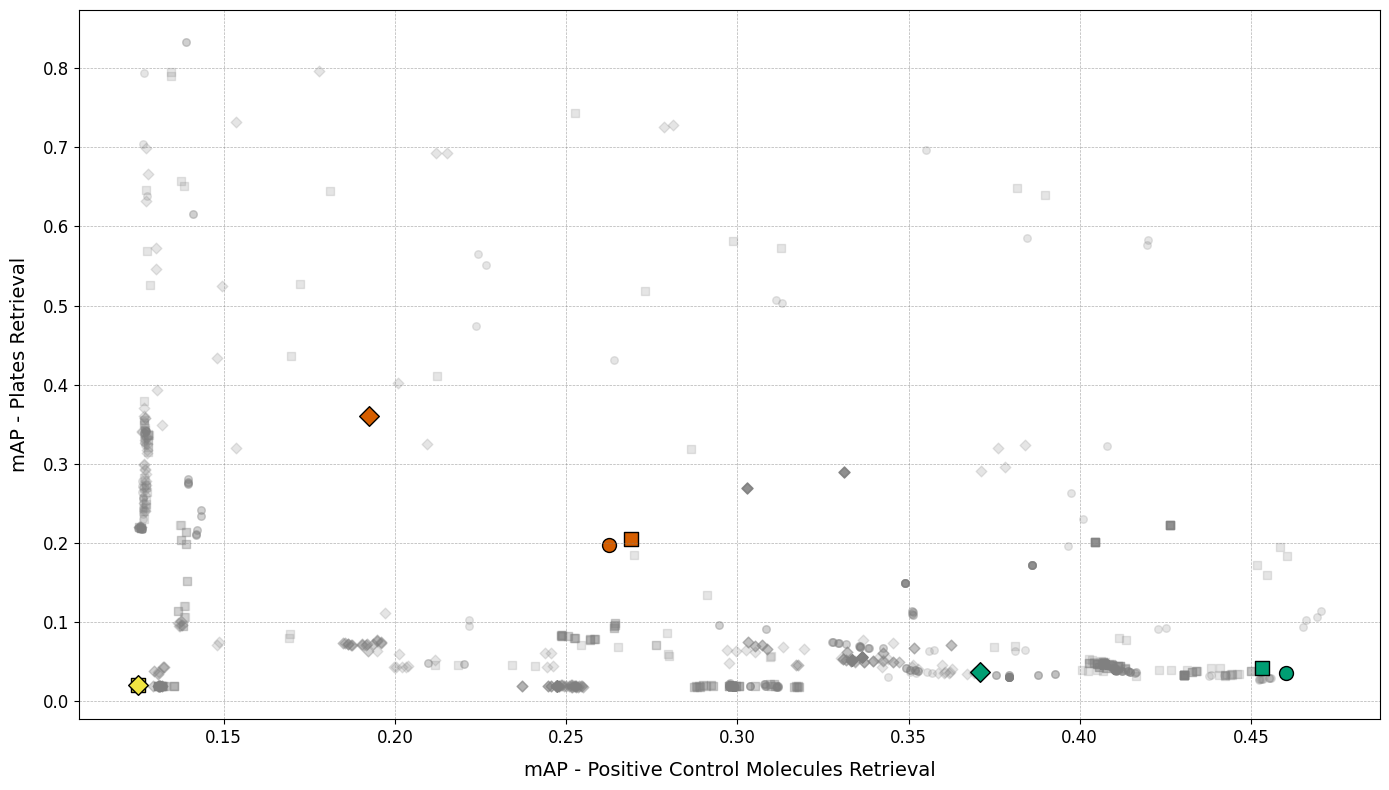

In [16]:
plot_curve_comparison(all_encoder)

In [1]:
import pandas as pd

In [2]:
pd.read_json('/projects/synsight/repos/phenoseeker/scripts/balanced_plates.json')

,Metadata_Source,Metadata_Batch,Metadata_Plate
0,source_1,Batch6_20221102,UL000585
1,source_1,Batch6_20221102,UL000579
2,source_1,Batch6_20221102,UL000595
3,source_1,Batch2_20221006,UL001679
4,source_1,Batch4_20221012,UL000095
5,source_10,2021_06_01_U2OS_48_hr_run2,Dest210601-154924
6,source_10,2021_06_01_U2OS_48_hr_run2,Dest210601-153742
7,source_10,2021_07_07_U2OS_48_hr_run11,Dest210707-094231
8,source_10,2021_08_12_U2OS_48_hr_run15,Dest210803-154133
9,source_10,2021_06_21_U2OS_48_hr_run7,Dest210621-132852
